In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 17.9 MB/s 


In [ ]:
import pandas as pd
# import sweetviz as sv
import IPython
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as ex
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, 
                             classification_report, confusion_matrix, roc_auc_score)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, early_stopping
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("income_evaluation.csv")
df = df.sample(frac=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
10332,24,Private,329530,9th,5,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,Mexico,<=50K
30180,37,Private,89718,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K
23614,31,Private,175509,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
4032,40,Private,184105,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
419,34,State-gov,240283,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
print("Dimensions",df.shape)
print(df.info())

Dimensions (32561, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 17520 to 28445
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None


In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = names

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

In [ ]:
print(categorical)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [ ]:
print(numerical)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
a = categorical
for i in a:
    df[i] = df[i].astype('|S')
    df[i] = label_encoder.fit_transform(df[i])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
10332,24,4,329530,6,5,2,12,0,4,1,0,0,45,26,0
30180,37,4,89718,15,10,2,14,0,4,1,0,0,45,39,0
23614,31,4,175509,9,13,4,10,1,4,1,0,0,50,39,0
4032,40,4,184105,8,11,2,3,0,4,1,0,0,40,39,1
419,34,7,240283,11,9,0,14,4,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,44,5,64632,10,16,2,10,0,4,1,0,0,60,39,0
4080,19,0,208874,15,10,4,0,3,4,1,0,0,40,39,0
1759,19,4,197384,15,10,4,8,3,4,0,0,0,10,39,0
6079,23,4,86065,2,8,4,8,1,4,0,0,0,30,39,0


Visualization

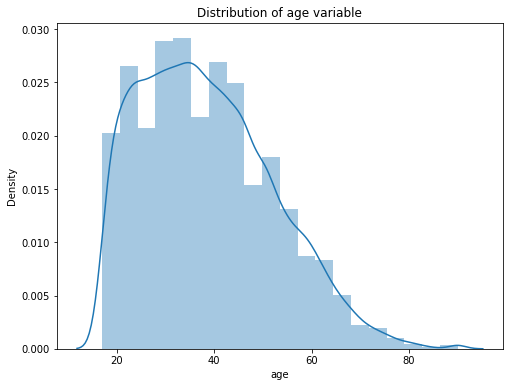

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = df['age']
sns.color_palette("hls", 8)
x = pd.Series(x, name="age")
ax = sns.distplot(x, bins=20)
ax.set_title("Distribution of age variable")
plt.show()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


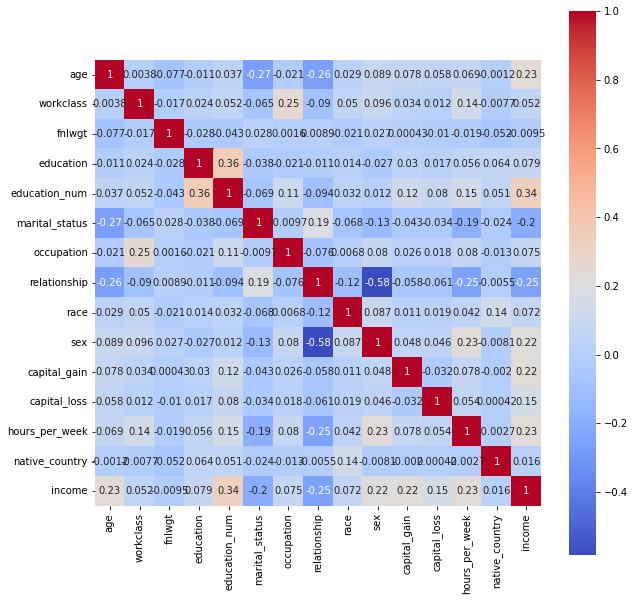

(32561, 15)

In [ ]:

colormap=plt.cm.PuBu
features_mean=(df.columns[:18])
print(features_mean)
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(),linecolor="white", annot=True, square=True, cmap='coolwarm')
plt.show()
df.shape

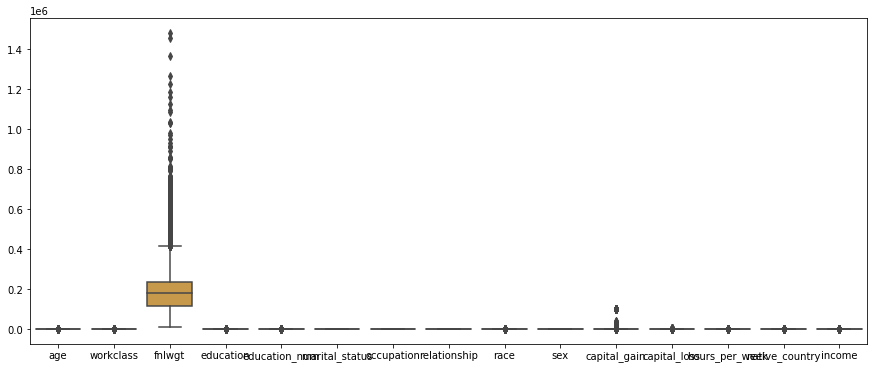

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49b4421d90>,
      dtype=object)

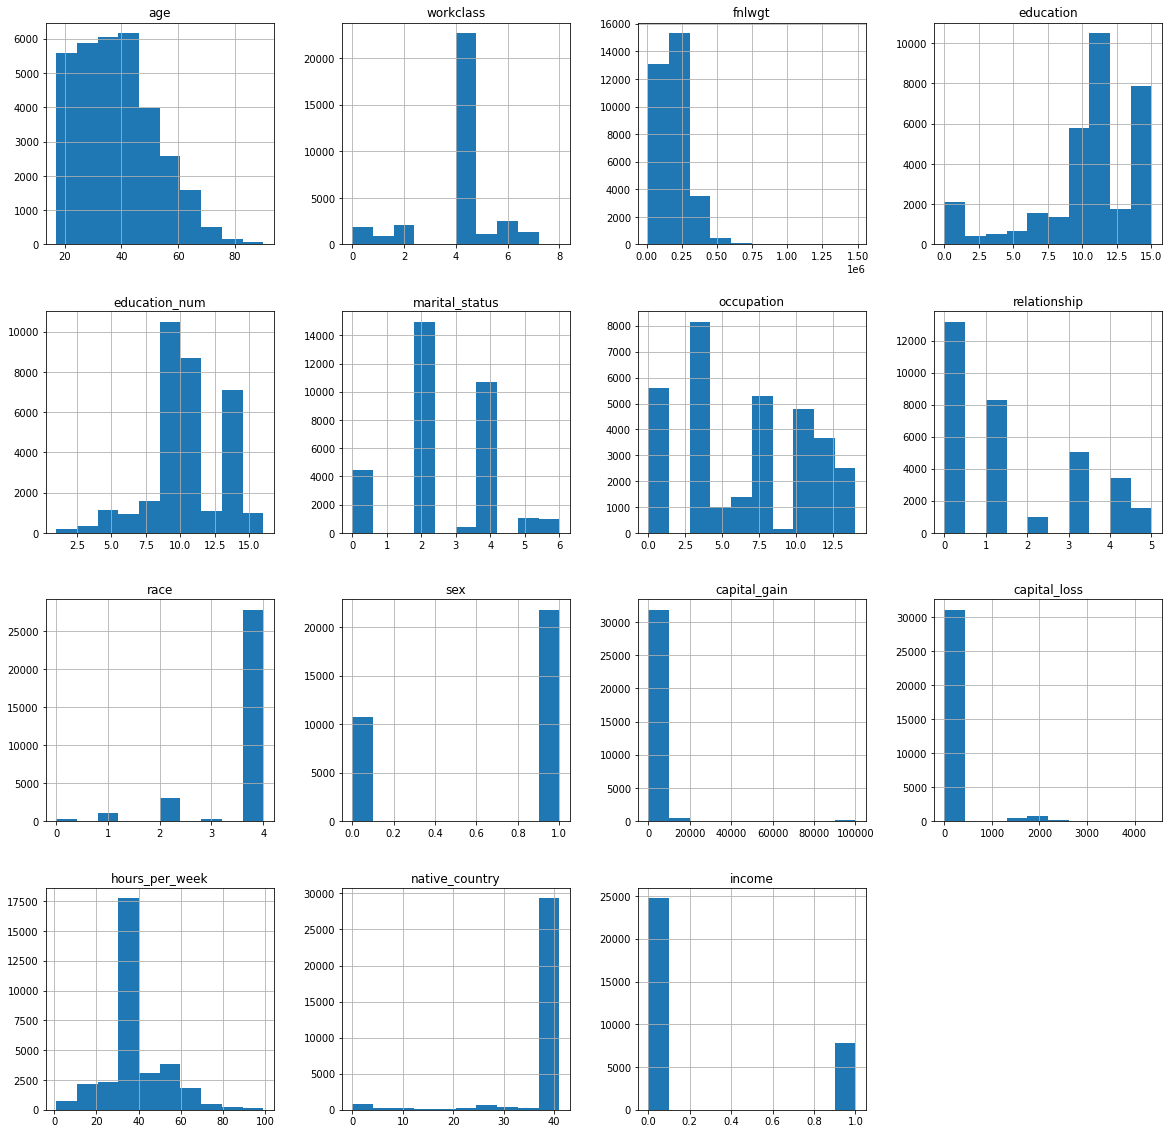

In [ ]:
df.hist(figsize=(20,20))

Text(0.5, 0, 'Income')

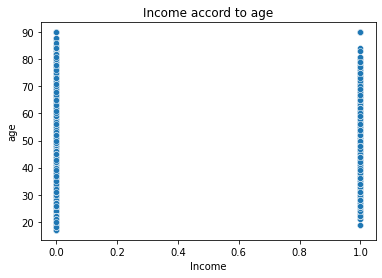

In [ ]:
ax=sns.scatterplot(x='income',y='age',data=df)
ax.set_title('Income accord to age')
ax.set_xlabel('Income')

Text(0.5, 0, 'Income')

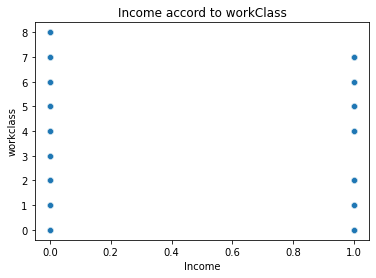

In [ ]:
ax=sns.scatterplot(x='income',y='workclass',data=df)
ax.set_title('Income accord to workClass')
ax.set_xlabel('Income')

In [ ]:
more_40 = df[(df['hours_per_week']>= 40) & (df['hours_per_week']< 50)]['hours_per_week']
more_50 = df[(df['hours_per_week']>= 50) & (df['hours_per_week'] < 60)]['hours_per_week']
more_60 = df[(df['hours_per_week']>= 60) & (df['hours_per_week'] < 70)]['hours_per_week']

In [ ]:
pd.crosstab(more_40,df['income']).sum()
pd.crosstab(more_50,df['income']).sum()
pd.crosstab(more_60,df['income']).sum()

income
0    1020
1     776
dtype: int64

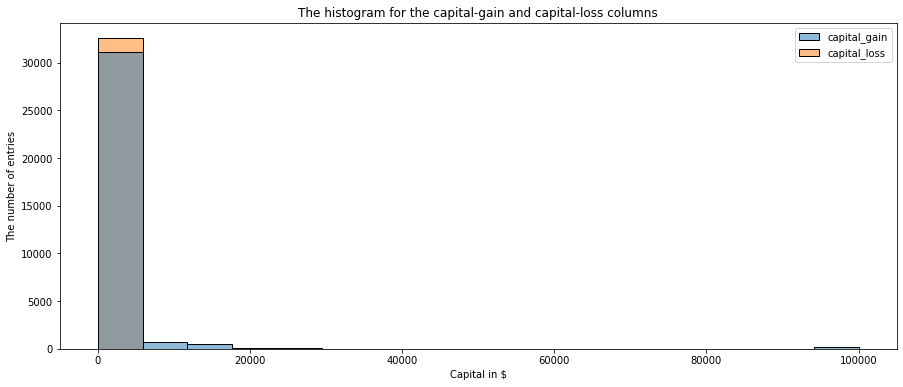

In [ ]:
plt.figure(figsize=(15,6))
plt.title(f'The histogram for the capital-gain and capital-loss columns')
sns.histplot( data=df[['capital_gain','capital_loss']])
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

In [ ]:
#check for duplicates
display(df.loc[df.duplicated()].head())

df.drop_duplicates(inplace=True)
print('The number of duplicates in the data is ', df.duplicated().sum())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
28846,39,4,30916,11,9,2,3,0,4,1,0,0,40,39,0
25872,23,4,240137,4,3,4,6,1,4,1,0,0,55,26,0
4767,21,4,250051,15,10,4,10,3,4,0,0,0,10,39,0
4881,25,4,308144,9,13,4,3,1,4,1,0,0,40,26,0
5104,90,4,52386,15,10,4,8,1,1,1,0,0,35,39,0


The number of duplicates in the data is  0


In [ ]:
df_obj =df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [ ]:
def remove_question_mark(dataset):
    for col in dataset.columns:
        dataset[col].replace('?', np.NaN, inplace=True)
    return dataset.info()    
remove_question_mark(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 10332 to 32535
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


In [ ]:
observations_0 = df.shape[0] 
df.dropna(inplace=True)
observations_1 = df.shape[0] 
print("Number of rows dropped: {}".format(observations_0-observations_1))

Number of rows dropped: 0


In [ ]:
# Combined in one married class
df['marital_status'] = df['marital_status'].replace(["Married-civ-spouse", "Married-AF-spouse",  "Married-spouse-absent"], 'Married')

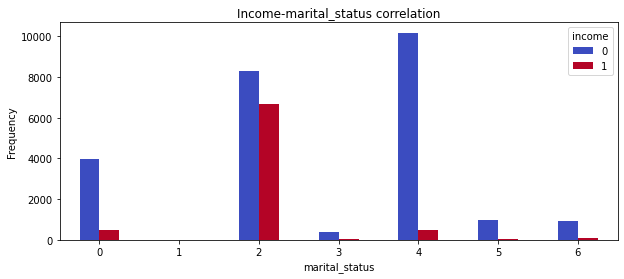

In [ ]:
pd.crosstab(df['marital_status'],df['income']).plot(kind="bar",figsize=(10,4),colormap="coolwarm")
plt.title('Income-marital_status correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(df['marital_status'],df['income'])

income,<=50K,>50K
marital_status,,
Divorced,3978,463
Married,8677,6734
Never-married,10176,491
Separated,959,66
Widowed,908,85


In [ ]:
df["capital"] = df["capital_gain"] - df["capital_loss"]
df.drop(["capital_gain", "capital_loss"], inplace=True, axis=1)

In [ ]:
df.loc[(df["native_country"] != 'United-States'),'native_country']='Other'

In [189]:
df.drop(["fnlwgt", "education"], inplace=True, axis=1)

In [ ]:
df['relationship'] = df['relationship'].replace(["Husband", "Wife"], 'Spouse')

In [ ]:
pd.crosstab(df['sex'],df['income'])

income,0,1
sex,,
0,5597,479
1,7916,2771


In [ ]:
df.columns
# print('\n',categorical)

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'income', 'capital'],
      dtype='object')

In [190]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                     age  workclass  education_num  marital_status  \
age             1.000000   0.003787       0.036527        0.266288   
workclass       0.003787   1.000000       0.052085        0.064731   
education_num   0.036527   0.052085       1.000000        0.069304   
marital_status  0.266288   0.064731       0.069304        1.000000   
occupation      0.020947   0.254892       0.109697        0.009654   
relationship    0.263698   0.090461       0.094153        0.185451   
race            0.028718   0.049742       0.031838        0.068013   
sex             0.088832   0.095981       0.012280        0.129314   
capital_gain    0.077674   0.033835       0.122630        0.043393   
capital_loss    0.057775   0.012216       0.079923        0.034187   
hours_per_week  0.068756   0.138962       0.148123        0.190519   
native_country  0.001151   0.007690       0.050840        0.023819   
income          0.234037   0.051604       0.335154        0.199307   

                occ

In [191]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                age  workclass  education_num  marital_status  occupation  \
age             NaN   0.003787       0.036527        0.266288    0.020947   
workclass       NaN        NaN       0.052085        0.064731    0.254892   
education_num   NaN        NaN            NaN        0.069304    0.109697   
marital_status  NaN        NaN            NaN             NaN    0.009654   
occupation      NaN        NaN            NaN             NaN         NaN   
relationship    NaN        NaN            NaN             NaN         NaN   
race            NaN        NaN            NaN             NaN         NaN   
sex             NaN        NaN            NaN             NaN         NaN   
capital_gain    NaN        NaN            NaN             NaN         NaN   
capital_loss    NaN        NaN            NaN             NaN         NaN   
hours_per_week  NaN        NaN            NaN             NaN         NaN   
native_country  NaN        NaN            NaN             NaN         NaN   

In [192]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


[]


In [193]:
df1 = df.drop(df.columns[to_drop], axis=1)
print(); print(df1.head())


       age  workclass  education_num  marital_status  occupation  \
10332   24          4              5               2          12   
30180   37          4             10               2          14   
23614   31          4             13               4          10   
4032    40          4             11               2           3   
419     34          7              9               0          14   

       relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
10332             0     4    1             0             0              45   
30180             0     4    1             0             0              45   
23614             1     4    1             0             0              50   
4032              0     4    1             0             0              40   
419               4     4    0             0             0              40   

       native_country  income  
10332              26       0  
30180              39       0  
23614              39    

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')


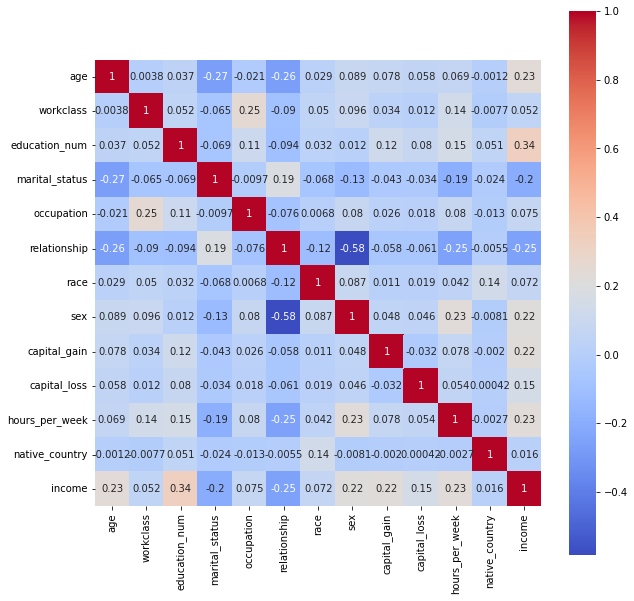

(32561, 13)

In [194]:
colormap=plt.cm.PuBu
features_mean=(df.columns[:18])
print(features_mean)
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(),linecolor="white", annot=True, square=True, cmap='coolwarm')
plt.show()
df.shape

Encode categorical variables

In [ ]:
categorical


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [ ]:
df.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'income', 'capital'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 8463 to 19711
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   education_num   30139 non-null  int64
 3   marital_status  30139 non-null  int64
 4   occupation      30139 non-null  int64
 5   relationship    30139 non-null  int64
 6   race            30139 non-null  int64
 7   sex             30139 non-null  int64
 8   hours_per_week  30139 non-null  int64
 9   native_country  30139 non-null  int64
 10  income          30139 non-null  int64
 11  capital         30139 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


Drop label variable

In [ ]:
df_encoded = pd.get_dummies(df)
df_encoded

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital
17520,31,6,16,4,2,3,4,0,48,0,0,0
28970,33,4,14,2,9,5,4,0,50,0,1,0
5654,25,4,13,4,5,1,4,1,40,0,0,0
2809,30,4,13,4,1,1,4,0,40,0,0,0
11,30,7,13,2,2,0,1,1,40,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21125,21,0,10,4,0,3,4,1,48,0,0,0
29893,20,4,9,4,8,3,4,1,30,0,0,0
30368,26,4,9,2,2,1,2,1,40,0,0,0
18374,39,7,10,2,3,0,4,1,70,0,0,0


 Feature Scaling

In [ ]:
scaler = MinMaxScaler()
df_encoded[['age', 'hours_per_week', "capital", "education_num" ]] = scaler.fit_transform(df_encoded[['age', 'hours_per_week', "capital", "education_num" ]])
df_encoded

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital
17520,0.191781,6,1.000000,4,2,3,4,0,0.479592,0,0,0.041742
28970,0.219178,4,0.866667,2,9,5,4,0,0.500000,0,1,0.041742
5654,0.109589,4,0.800000,4,5,1,4,1,0.397959,0,0,0.041742
2809,0.178082,4,0.800000,4,1,1,4,0,0.397959,0,0,0.041742
11,0.178082,7,0.800000,2,2,0,1,1,0.397959,0,1,0.041742
...,...,...,...,...,...,...,...,...,...,...,...,...
21125,0.054795,0,0.600000,4,0,3,4,1,0.479592,0,0,0.041742
29893,0.041096,4,0.533333,4,8,3,4,1,0.295918,0,0,0.041742
30368,0.123288,4,0.533333,2,2,1,2,1,0.397959,0,0,0.041742
18374,0.301370,7,0.600000,2,3,0,4,1,0.704082,0,0,0.041742


In [ ]:
df.shape

(32537, 12)

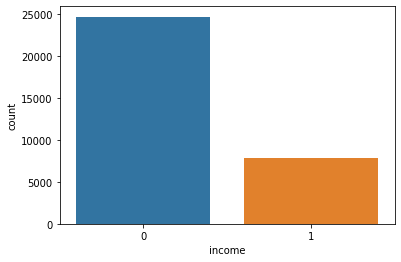

In [ ]:
X = df_encoded.drop(columns=['income'])
y = df_encoded['income']

import seaborn as sns
sns.countplot(y, label='count')

In [ ]:
y

6327     0
31533    1
32514    0
17253    0
27066    0
        ..
19818    0
14337    1
25719    0
24119    0
31057    0
Name: income, Length: 16763, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.8.1


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
df = df.sample(frac=1)

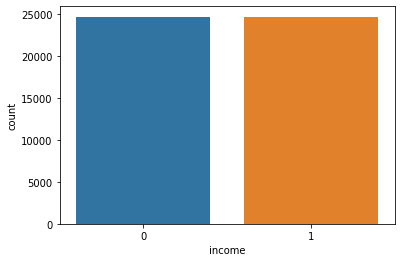

In [ ]:
sns.countplot(y, label='count')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model_LR= LogisticRegression()

parameters_log = {
    'solver': ['liblinear', "saga"],
    'C': [0.1, 1, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.5, 0.2, 0.7]
    }

grid_log = GridSearchCV(model_LR, param_grid = parameters_log, scoring='accuracy', cv=5)
grid_log.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 0.01], 'l1_ratio': [0.5, 0.2, 0.7],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", grid_log.best_params_)
print("Accuracy :",grid_log.best_score_)

y_pred_train_log = grid_log.predict(X_train)
y_pred_test_log = grid_log.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_test_log)

print("Accuracy on train data: {}".format(accuracy_score(y_train, y_pred_train_log)))
print("Accuracy on test data: {}".format(accuracy_log))

Tuned Hyperparameters : {'C': 1, 'l1_ratio': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7622696905788583
Accuracy on train data: 0.7625589264540013
Accuracy on test data: 0.761252446183953


In [ ]:
print("Test accuracy for Logistic Regression: ",accuracy_log)

Test accuracy for Logistic Regression:  0.761252446183953


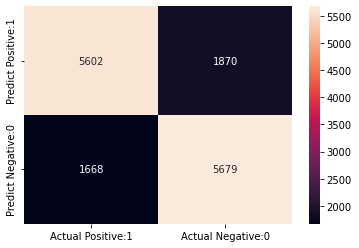

In [ ]:
cm_matrix_log = pd.DataFrame(data=confusion_matrix(y_test,y_pred_test_log), columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_log, annot=True, fmt='d')

In [ ]:
ada = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [ ]:
models = [ada, gbc, lgb, xgb]
selection = pd.DataFrame(columns=['name', 'accuracy'])

for model in models:
    name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.sum((y_test == y_pred)) / y_test.shape[0]
    
    selection = selection.append({'name': name, 'accuracy': accuracy}, ignore_index=True)

selection

,name,accuracy
0,AdaBoostClassifier,0.846278
1,GradientBoostingClassifier,0.859437
2,LGBMClassifier,0.895472
3,XGBClassifier,0.855658


In [ ]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

print(precision.shape, recall.shape, thresholds.shape)

(10338,) (10338,) (10337,)


In [ ]:
print("First 5 elements of precision:", precision[:5])
print("First 5 elements of recall:", recall[:5])
print("First 5 elements of threshold:", thresholds[:5])

print("Last 5 elements of precision:", precision[-5:])
print("Last 5 elements of recall:", recall[-5:])
print("Last 4 elements of threshold:", thresholds[-4:])

First 5 elements of precision: [0.50914761 0.50911359 0.50914888 0.50918417 0.50921946]
First 5 elements of recall: [1.         0.99986389 0.99986389 0.99986389 0.99986389]
First 5 elements of threshold: [0.00355202 0.00355346 0.00356719 0.00358103 0.00358586]
Last 5 elements of precision: [1. 1. 1. 1. 1.]
Last 5 elements of recall: [0.00054444 0.00040833 0.00027222 0.00013611 0.        ]
Last 4 elements of threshold: [0.9986755  0.99872285 0.99880254 0.9989654 ]


In [ ]:
metric_df = pd.DataFrame(columns=['precision', 'recall', 'threshold'])
metric_df['precision'] = precision[:-1]
metric_df['recall'] = recall[:-1]
metric_df['threshold'] = thresholds

metric_df.head()

,precision,recall,threshold
0,0.509148,1.000000,0.003552
1,0.509114,0.999864,0.003553
2,0.509149,0.999864,0.003567
3,0.509184,0.999864,0.003581
4,0.509219,0.999864,0.003586


Precision at the threshold 0.5000: 0.8267
Recall at the threshold 0.5000: 0.8968


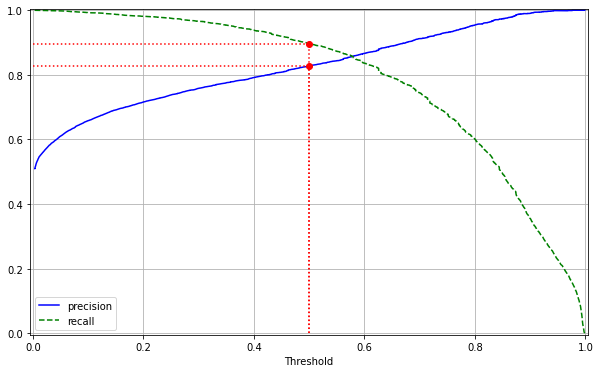

In [ ]:
th_def = 0.5
pred_def = (y_pred_proba >= th_def).astype(np.int64)
tp = np.sum(((y_test == 1) & (pred_def == 1)))
fp = np.sum(((y_test == 0) & (pred_def == 1)))
tn = np.sum(((y_test == 0) & (pred_def == 0)))
fn = np.sum(((y_test == 1) & (pred_def == 0)))
pr_def = tp / (tp + fp)
re_def = tp / (tp + fn)
print('Precision at the threshold %.4f: %.4f' % (th_def, pr_def))
print('Recall at the threshold %.4f: %.4f' % (th_def, re_def))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], '-', color='blue', label='precision')
plt.plot(thresholds, recall[:-1], '--', color='green', label='recall')

plt.plot([0, th_def], [pr_def, pr_def], ':', color='red')
plt.plot([th_def, th_def], [0, pr_def], ':', color='red')
plt.plot([th_def], [pr_def], ':', marker='o', color='red')
plt.plot([0, th_def], [re_def, re_def], ':', color='red')
plt.plot([th_def, th_def], [0, re_def], ':', color='red')
plt.plot([th_def], [re_def], ':', marker='o', color='red')

plt.grid(True)
plt.xlabel('Threshold')
plt.xlim([-0.005, 1.005])
plt.ylim([-0.005, 1.005])
plt.legend()
plt.show()

In [ ]:
conmat = confusion_matrix(y_test, y_pred)
print(y_test.value_counts())
print(conmat)

0    7472
1    7347
Name: income, dtype: int64
[[6091 1381]
 [ 758 6589]]


In [ ]:
condf = pd.DataFrame(columns=['Actually Positive', 'Actually Negative'], index=['Predicted Positive', 'Predicted Negative'])
for i in range(2):
    for j in range(2):
        condf.iloc[i, j] = conmat.T[(1-i), (1-j)]
condf

,Actually Positive,Actually Negative
Predicted Positive,6589,1381
Predicted Negative,758,6091


In [ ]:
threshold = 0.4

# obtain array of the new predicted class
new_pred = (y_pred_proba >= threshold).astype(np.int64)

pred_df = pd.DataFrame([y_test.value_counts(), pd.Series(y_pred).value_counts(), pd.Series(new_pred).value_counts()]).T
pred_df.columns = ['True values', 'threshold 0.5', 'threshold '+str(threshold)]
pred_df

,True values,threshold 0.5,threshold 0.4
0,7472,6849,6110
1,7347,7970,8709


In [ ]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)

print(fpr.shape, tpr.shape, roc_thresholds.shape)
print(fpr[-5:])
print(tpr[-5:])
print(roc_thresholds[-5:])

(4382,) (4382,) (4382,)
[0.99906317 0.999197   0.99946467 0.99973233 1.        ]
[1. 1. 1. 1. 1.]
[0.00148317 0.00145983 0.00141799 0.00111911 0.00109889]


In [ ]:
print(thresholds.shape)
print(roc_thresholds.shape)

(10337,)
(4382,)


In [ ]:
thdf1 = pd.DataFrame(thresholds, columns=['threshold'])
thdf1['recall'] = recall[:-1]

thdf2 = pd.DataFrame(roc_thresholds, columns=['threshold'])
thdf2['tpr'] = tpr

join = pd.merge(left=thdf1, right=thdf2, on='threshold', how='inner')

In [195]:
join.head(10)

,threshold,recall,tpr
0,0.003552,1.000000,1.000000
1,0.003553,0.999864,0.999864
2,0.003586,0.999864,0.999864
3,0.003591,0.999864,0.999864
4,0.003620,0.999864,0.999864
5,0.003625,0.999864,0.999864
6,0.003651,0.999864,0.999864
7,0.003652,0.999864,0.999864
8,0.003678,0.999864,0.999864
9,0.003688,0.999864,0.999864


In [196]:
join.tail(10)

,threshold,recall,tpr
4272,0.997566,0.006942,0.006942
4273,0.997575,0.006669,0.006669
4274,0.997645,0.005717,0.005717
4275,0.997662,0.005444,0.005444
4276,0.997709,0.004628,0.004628
4277,0.997783,0.004356,0.004356
4278,0.997808,0.003947,0.003947
4279,0.998396,0.001633,0.001633
4280,0.998533,0.001361,0.001361
4281,0.998965,0.000136,0.000136


In [ ]:
fprtpr = pd.DataFrame(columns=['threshold', 'fpr', 'tpr'])
fprtpr['threshold'] = roc_thresholds
fprtpr['fpr'] = fpr
fprtpr['tpr'] = tpr

FPR at the threshold 0.5001: 0.1846
TPR at the threshold 0.5001: 0.8968


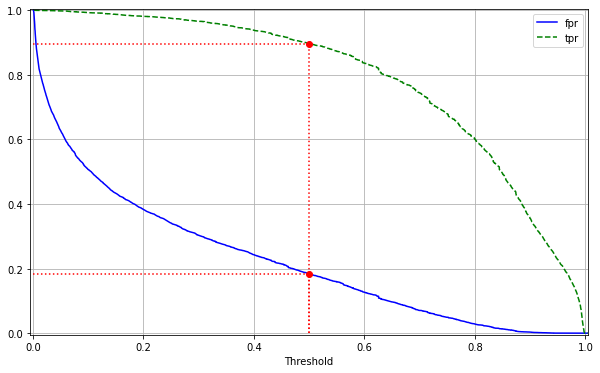

In [ ]:
default = fprtpr[fprtpr['threshold'] >= 0.5]['threshold'].min() # the threshold closest to 0.5
fpr_def = fprtpr[fprtpr['threshold'] == default]['fpr'].iloc[0]
tpr_def = fprtpr[fprtpr['threshold'] == default]['tpr'].iloc[0]
print('FPR at the threshold %.4f: %.4f' % (default, fpr_def))
print('TPR at the threshold %.4f: %.4f' % (default, tpr_def))

plt.figure(figsize=(10, 6))
plt.plot(roc_thresholds, fpr, '-', color='blue', label='fpr')
plt.plot(roc_thresholds, tpr, '--', color='green', label='tpr')

plt.plot([0, default], [fpr_def, fpr_def], ':', color='red')
plt.plot([default, default], [0, fpr_def], ':', color='red')
plt.plot([default], [fpr_def], ':', marker='o', color='red')
plt.plot([0, default], [tpr_def, tpr_def], ':', color='red')
plt.plot([default, default], [0, tpr_def], ':', color='red')
plt.plot([default], [tpr_def], ':', marker='o', color='red')

plt.grid(True)
plt.xlabel('Threshold')
plt.xlim([-0.005, 1.005])
plt.ylim([-0.005, 1.005])
plt.legend()
plt.show()

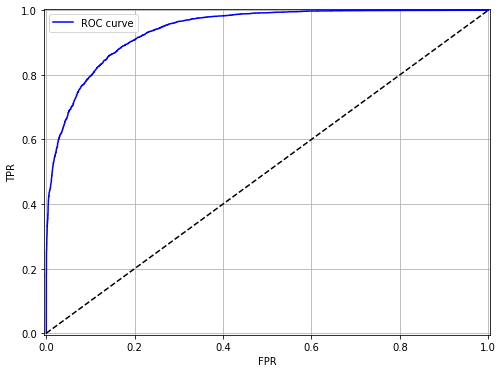

In [ ]:
# roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, '-', color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.xlim([-0.005, 1.005])
plt.ylim([-0.005, 1.005])
plt.legend()
plt.show()

In [ ]:
roc_auc1 = roc_auc_score(y_test, y_pred_proba)
roc_auc2 = auc(fpr, tpr)

print('ROC AUC by roc_auc_score: %.4f, ROC AUC by auc: %.4f' % (roc_auc1, roc_auc2))
print(roc_auc1 == roc_auc2)

ROC AUC by roc_auc_score: 0.9408, ROC AUC by auc: 0.9408
True
